# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [2]:
# Import your libraries
import pandas as pd
import requests

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [39]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [4]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [5]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [6]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [7]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [8]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

In [7]:
train_dataset.columns


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [9]:
#checking types of data
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [99]:
train_dataset[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].describe()


,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


# Standardization

In [117]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(train_dataset[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
train_dataset2 = pd.DataFrame(Xpr,columns=train_dataset[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].columns)
train_dataset2['10']=train_dataset['10']
train_dataset2



,0,1,2,3,4,5,6,7,8,9,10
0,0.276225,0.027025,-0.149000,0.506669,0.216542,0.359647,0.457467,0.402110,0.232397,0.206983,Marcus
1,0.187618,0.058792,0.051810,0.484561,0.176889,-0.235185,0.202128,0.694277,0.180889,-0.285762,Clarius
2,-0.090256,0.045123,0.107655,-0.085552,0.173952,-0.526971,0.178836,-0.011431,0.555573,-0.567606,Philippus
3,-0.115711,-0.062368,0.120132,-0.557791,-0.066590,-0.343021,-0.071236,-0.574300,-0.360741,-0.264636,Philippus
4,-0.101842,-0.030604,0.096399,-0.116400,0.058980,-0.195384,0.141750,-0.682696,-0.611992,-0.251983,Philippus
...,...,...,...,...,...,...,...,...,...,...,...
12012,0.031903,-0.014324,-0.941505,-0.063462,0.117768,0.060289,0.107577,0.261194,0.094861,0.044953,Marcus
12013,-0.101221,0.008291,0.094574,-0.110834,0.113668,-0.666373,-0.117629,0.430473,-0.056519,-0.556008,Philippus
12014,0.003102,0.022139,-0.909049,-0.170145,-0.229472,-0.061284,0.073375,0.201129,0.195504,-0.060903,Marcus
12015,0.311288,0.191740,0.137092,-0.182721,0.337886,0.029385,0.424819,0.548833,0.455570,-0.099455,Marcus


In [126]:
Xpr = tr.fit_transform(test_dataset)
test_dataset2 = pd.DataFrame(Xpr,columns=test_dataset.columns)
test_dataset2

,0,1,2,3,4,5,6,7,8,9
0,-0.023337,0.119525,0.084419,0.822759,0.152030,0.103838,0.087966,0.264775,-0.419162,0.116937
1,-0.065725,0.008779,-0.932065,-0.148430,0.021328,0.219138,0.032388,0.029692,0.075145,0.220845
2,0.770069,0.233697,-0.106320,-0.224216,0.198065,0.072042,0.348048,0.263461,-0.233972,-0.033027
3,0.293214,-0.213890,0.240007,-0.554744,0.175076,0.007780,0.127095,0.674436,0.026629,0.022213
4,-0.254864,0.175281,0.439458,0.146071,0.168438,0.472391,0.499691,0.096590,0.326133,0.270099
...,...,...,...,...,...,...,...,...,...,...
8007,-0.016978,0.641487,0.336688,-0.070542,0.296414,-0.460033,-0.221527,0.057971,0.296598,-0.173128
8008,-0.033683,-0.297538,0.214735,0.132241,0.134879,0.630441,0.296631,-0.232799,0.265760,0.467200
8009,-0.041405,0.176046,0.156241,0.204140,0.165801,-0.601421,0.071507,0.493039,0.025218,-0.513006
8010,0.070863,0.085367,0.206083,-0.439301,0.167189,0.114192,0.146001,0.763623,0.309156,0.105970


In [111]:
#checking null values
train_dataset2.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
names    0
dtype: int64

In [31]:
names=set(train_dataset['10'])
names

{'Clarius',
 'Coronavirucus',
 'Esequlius',
 'Marcus',
 'Mongucus',
 'Paithonius',
 'Philippus',
 'Ubuntius'}

# Checking correlation between features

In [118]:
#transforming classes in numbers
LabelDiz={'Clarius':'1',
          'Coronavirucus': '2',
          'Esequlius':'3', 
          'Marcus':'4',
          'Mongucus':'5',
          'Paithonius': '6',
          'Philippus':'7',
          'Ubuntius':'8'
         }
def label(x):
    return int(LabelDiz[x])
train_dataset2['names']=train_dataset2['10'].apply(label)


In [116]:
#checking the datatypes of the new column
train_dataset2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
names      int64
dtype: object

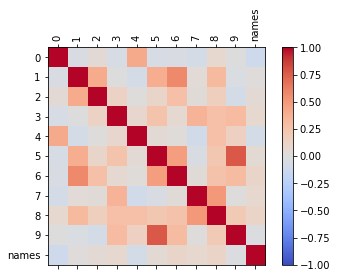

In [47]:
#checking correlation between variables
from matplotlib import pyplot as plt
import numpy as np
corr = train_dataset2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_dataset2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_dataset2.columns)
ax.set_yticklabels(train_dataset2.columns)
plt.show();

Variables are not very correlated.

In [119]:
train_dataset2.head()

,0,1,2,3,4,5,6,7,8,9,10,names
0,0.276225,0.027025,-0.149000,0.506669,0.216542,0.359647,0.457467,0.402110,0.232397,0.206983,Marcus,4
1,0.187618,0.058792,0.051810,0.484561,0.176889,-0.235185,0.202128,0.694277,0.180889,-0.285762,Clarius,1
2,-0.090256,0.045123,0.107655,-0.085552,0.173952,-0.526971,0.178836,-0.011431,0.555573,-0.567606,Philippus,7
3,-0.115711,-0.062368,0.120132,-0.557791,-0.066590,-0.343021,-0.071236,-0.574300,-0.360741,-0.264636,Philippus,7
4,-0.101842,-0.030604,0.096399,-0.116400,0.058980,-0.195384,0.141750,-0.682696,-0.611992,-0.251983,Philippus,7


In [120]:
from sklearn.model_selection import train_test_split
train_dataset_X=train_dataset2[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
train_dataset_y=train_dataset2['names']
X_train, X_test, y_train, y_test = train_test_split(train_dataset_X, train_dataset_y, test_size = 0.2, random_state = 0)



In [124]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
#from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    
    "KMeans": KMeans( random_state=0),
    "SVC": SVC(gamma='auto'),
    "LogisticRegression": LogisticRegression(solver="lbfgs" ),
    "KNeighbors":KNeighborsClassifier(n_neighbors=3),
    "RandomFores":RandomForestClassifier(n_estimators = 1000, random_state = 42)
}

# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Training complete")

Training KMeans...
Training SVC...
Training LogisticRegression...
Training KNeighbors...
Training RandomFores...
Training complete


In [125]:
from sklearn.metrics import classification_report
predictions={}
for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[name]=y_pred
    print(f"Evaluating model {name}")
    print(classification_report(y_test,y_pred))
        

print("Pred complete")

Evaluating model KMeans
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.25      0.18      0.21       485
           2       0.04      0.06      0.05       203
           3       0.05      0.25      0.08        81
           4       0.53      0.24      0.33      1024
           5       0.07      0.08      0.07       128
           6       0.05      0.15      0.07       113
           7       0.04      0.02      0.03       273
           8       0.00      0.00      0.00        97

    accuracy                           0.17      2404
   macro avg       0.11      0.11      0.09      2404
weighted avg       0.29      0.17      0.20      2404



/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating model SVC
              precision    recall  f1-score   support

           1       0.43      0.26      0.33       485
           2       0.95      0.83      0.88       203
           3       0.00      0.00      0.00        81
           4       0.58      0.92      0.71      1024
           5       0.72      0.63      0.68       128
           6       0.56      0.04      0.08       113
           7       0.61      0.44      0.51       273
           8       1.00      0.01      0.02        97

    accuracy                           0.60      2404
   macro avg       0.61      0.39      0.40      2404
weighted avg       0.59      0.60      0.54      2404

Evaluating model LogisticRegression
              precision    recall  f1-score   support

           1       0.44      0.29      0.35       485
           2       0.91      0.86      0.88       203
           3       0.33      0.01      0.02        81
           4       0.59      0.85      0.69      1024
           5       0.

/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating model KNeighbors
              precision    recall  f1-score   support

           1       0.54      0.63      0.58       485
           2       0.93      0.95      0.94       203
           3       0.54      0.37      0.44        81
           4       0.76      0.78      0.77      1024
           5       0.81      0.80      0.81       128
           6       0.54      0.47      0.50       113
           7       0.71      0.60      0.65       273
           8       0.57      0.40      0.47        97

    accuracy                           0.70      2404
   macro avg       0.67      0.63      0.65      2404
weighted avg       0.70      0.70      0.70      2404

Evaluating model RandomFores
              precision    recall  f1-score   support

           1       0.88      0.75      0.81       485
           2       1.00      0.95      0.97       203
           3       0.97      0.74      0.84        81
           4       0.85      0.96      0.90      1024
           5       0.

In [93]:
#train themodel with the whole dataset
RFmodel=RandomForestClassifier(n_estimators = 1000, random_state = 42)
train_dataset_X=train_dataset[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
train_dataset_y=train_dataset['10']
m.fit(train_dataset_X, train_dataset_y)
y_pred=model.predict(test_dataset2)

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [94]:
df=pd.DataFrame(y_pred)
df[0].value_counts()
df.to_csv('res.csv',header=False)

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [95]:
my_submission = "res.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9940089865202196,
 'quote': "AWESOME! A-W-E-S-O-M-E! Amazing score!!! So cool! I can't even... But wait, maybe...too good to be true? Overfit much?",
 'tip': 'If you think you may have overfitted your model, visit http://apila-bible.herokuapp.com/check/overfit on your browser for some follow up. ;)'}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)